# Trabalho de Estatística Computacional

Descrição do trabalho:

Trabalho sobre Teorema Central do Limite (Trabalho computacional).

Escolha 4 distribuições e seus parâmetros associados. 

Reporte a média e a variância de cada uma das distribuições. 


Simule: 1000 amostras de tamanho 20 e 1000 amostras de tamanho 100.
Para cada amostra simulada calcule a média e o total.
Faça gráficos da distribuição das médias e dos totais. 

Calcule a média e a variância das distribuição das médias e dos totais. 


Use algum teste de normalidade (shapiro wilk, Kolmogorov-Smirnov, ....) nas distribuição das médias e dos totais.

Contextualize os resultados obtidos com o Teorema Central do Limite.   

O trabalho pode ser feito em qualquer linguagem de programação. 

Deve ser enviado o relatório e o código.

## Comentários gerais sobre a execução do trabalho

- O formato escolhido para apresentar o trabalho foi usar o Jupyter notebook rodando sobre a linguagem Julia 1.6.1.Tal escolha é útil pois permite intercalar células com códigos executáveis e células com contendo textos informativos,como este.

- A linguagem Julia pode ser baixada no site https://julialang.org/ .

- Para usar Jupyter a biblioteca indicada para acessar notebooks é a IJulia.

- Será necessário baixar algumas bibliotecas para rodar este notebook.Alerto que todas fazem parte da stack oficialmente registrada no site da linguagem.

In [1]:
#Como importar e baixar pacotes com Julia.
#O nome do gerenciador de pacotes é "Pkg"


#importa a biblioteca,comando using
#using Pkg

#Instalando um pacote
#Pkg.add("Nome_do_Pacote")

#Importando novo pacote
#using Nome_do Pacote



## Importando as bibliotecas necessárias


In [2]:
using Pkg
Pkg.add("Distributions")
Pkg.add("HypothesisTests")
Pkg.add("Plots")
Pkg.add("Statistics")

In [3]:
using Random,Distributions,HypothesisTests,LinearAlgebra,Plots,Statistics

### Primeiro  Passo -  Escolhendo as distribuições e Reportando seu parâmetros.


In [4]:
#Primeira Distribuição
#Normal(1.5,2)
#Média = 1.5 e Variância = 4
D_Normal = Normal(1.5,2)

#Segunda Distribuição
#Binomial(5,0.4)
#Média = 2 e Variância = 1.2
D_Binomial = Binomial(5,0.4)

#Terceira Distribuição
#Poisson(2)
#Média = 2 e Variância = 2
D_Poisson = Poisson(2)

#Quarta Distribuição
#Uniforme(0,1)
#Média = 0.5 e Variância = 1/12
D_Uniform = Uniform(0,1)


Uniform{Float64}(a=0.0, b=1.0)

### Passo 2 - Simulação das Amostras

In [5]:
#1000 Amostras de tamanho 20
#Normal
X_20_Normal = [rand(D_Normal,20) for i in range(1,length=1000)]
#Binomial
X_20_Binomial = [rand(D_Binomial,20) for i in range(1,length=1000)]
#Poisson
X_20_Poisson = [rand(D_Poisson,20) for i in range(1,length=1000)]
#Uniforme
X_20_Uniforme = [rand(D_Uniform,20) for i in range(1,length=1000)]

1000-element Vector{Vector{Float64}}:
 [0.5686103928545947, 0.43343370675169357, 0.9855140622061116, 0.7148973088050208, 0.5126472940170057, 0.028732729655329026, 0.2739376447173083, 0.6874483108460685, 0.9254132081825406, 0.16588847165887732, 0.8423322316747961, 0.16650772515611423, 0.1568415664441496, 0.051268249551861045, 0.2758117266489468, 0.8004383809298836, 0.021665876251336202, 0.6889360124462851, 0.11585004453633352, 0.19427197648104144]
 [0.6380570484997912, 0.302353752184344, 0.9927078311676858, 0.8885443948247, 0.910585637416548, 0.3183454066346081, 0.15425586179994855, 0.8441610764860144, 0.5354985072192566, 0.117950962002904, 0.37390252925505973, 0.6216787558172812, 0.7824878144519103, 0.0775245373696074, 0.2643229905836604, 0.5109804560452673, 0.5425427274125465, 0.5384721690349401, 0.8360575842177751, 0.5993310772402958]
 [0.5686352972641968, 0.14042686333025323, 0.14484810720868713, 0.23644180225191902, 0.7973252180134462, 0.8539194943640824, 0.7568106804332106, 0.3571

In [6]:
#1000 Amostras de tamanho 100
#Normal
X_100_Normal = [rand(D_Normal,100) for i in range(1,length=1000)]
#Binomial
X_100_Binomial = [rand(D_Binomial,100) for i in range(1,length=1000)]
#Poisson
X_100_Poisson = [rand(D_Poisson,100) for i in range(1,length=1000)]
#Uniforme
X_100_Uniforme = [rand(D_Uniform,100) for i in range(1,length=1000)]

1000-element Vector{Vector{Float64}}:
 [0.745385620850028, 0.6369089739043305, 0.4074726472938459, 0.10207559726760485, 0.8493487292451325, 0.05397621061978697, 0.5436417812191745, 0.6734280473086274, 0.2226110581958065, 0.7150870066443473  …  0.6589978215949979, 0.8412807298421157, 0.0935032472680235, 0.5983563622818566, 0.1647504065587415, 0.3789577970258027, 0.4372325332140068, 0.7983197852358015, 0.39820023072813804, 0.12919185852915827]
 [0.3475831384421688, 0.5845149072114575, 0.1485949395970152, 0.04511525915309633, 0.8833499258254782, 0.9920678978980462, 0.4051471141265335, 0.44920475973216734, 0.3810739288299754, 0.13627290460728858  …  0.2898692580765214, 0.2793539972137711, 0.22061329662547857, 0.27209533888203685, 0.7885298456760472, 0.895578572164659, 0.9768723596454727, 0.9554644202205349, 0.2979339514013184, 0.12327789545447243]
 [0.6196645794627142, 0.6963467816521911, 0.7872630406061836, 0.09552641554187025, 0.44752163978027104, 0.8475486000290271, 0.2452424377207736, 

In [7]:
#Calculando Médias e Totais.Amostras de tamanho 20
#Amostra Normal
Media_20_Normal = [mean(X_20_Normal[i]) for i in range(1,length=1000)]
Total_20_Normal = [sum(X_20_Normal[i]) for i in range(1,length=1000)]
#Amostra Binomial
Media_20_Binomial = [mean(X_20_Binomial[i]) for i in range(1,length=1000)]
Total_20_Binomial = [sum(X_20_Binomial[i]) for i in range(1,length=1000)]
#Amostra Poisson
Media_20_Poisson = [mean(X_20_Poisson[i]) for i in range(1,length=1000)]
Total_20_Poisson = [sum(X_20_Poisson[i]) for i in range(1,length=1000)]
#Amostra Uniform
Media_20_Uniforme = [mean(X_20_Uniforme[i]) for i in range(1,length=1000)]
Total_20_Uniforme = [sum(X_20_Uniforme[i]) for i in range(1,length=1000)]

1000-element Vector{Float64}:
  8.610446919815299
 10.849761119664144
 10.0257379459348
  9.821609946955443
  9.85872307153815
 11.663234740347987
  8.832345782661053
  9.642271894831682
 12.5569367816808
 11.075258564796965
  9.208290760986308
 10.263362168834158
 10.464576702493211
  ⋮
  8.71683806717771
  8.915105762992695
  9.018836686722345
 11.859260930770922
 11.619129195057887
 10.439966576905913
  8.382470682878573
 10.232661164205425
  8.614259054420453
  9.289676176202047
 11.126840591519539
  9.198075406511524

In [8]:
#Calculando Médias e Totais.Amostras de tamanho 100
#Amostra Normal
Media_100_Normal = [mean(X_100_Normal[i]) for i in range(1,length=1000)]
Total_100_Normal = [sum(X_100_Normal[i]) for i in range(1,length=1000)]
#Amostra Binomial
Media_100_Binomial = [mean(X_100_Binomial[i]) for i in range(1,length=1000)]
Total_100_Binomial = [sum(X_100_Binomial[i]) for i in range(1,length=1000)]
#Amostra Poisson
Media_100_Poisson = [mean(X_100_Poisson[i]) for i in range(1,length=1000)]
Total_100_Poisson = [sum(X_100_Poisson[i]) for i in range(1,length=1000)]
#Amostra Uniform
Media_100_Uniforme = [mean(X_100_Uniforme[i]) for i in range(1,length=1000)]
Total_100_Uniforme = [sum(X_100_Uniforme[i]) for i in range(1,length=1000)]

1000-element Vector{Float64}:
 51.45702615010391
 49.88846965344032
 50.547049523627464
 52.92219205009364
 50.47447402145941
 47.33490949623654
 48.805248327158516
 48.73139742043032
 49.81206428077499
 54.942250481288774
 50.00467994497093
 50.10787451406624
 50.70639222760942
  ⋮
 46.37540781850855
 48.24795672538064
 46.79044824436234
 50.35237847823028
 46.4557161476456
 53.256754176995166
 51.30664387806366
 52.61215802768548
 49.63351283242314
 47.7407207154543
 47.85328288537753
 48.947375271929126

### Passo3-Gráficos das Médias e Normais

#### Amostras de tamanho 100

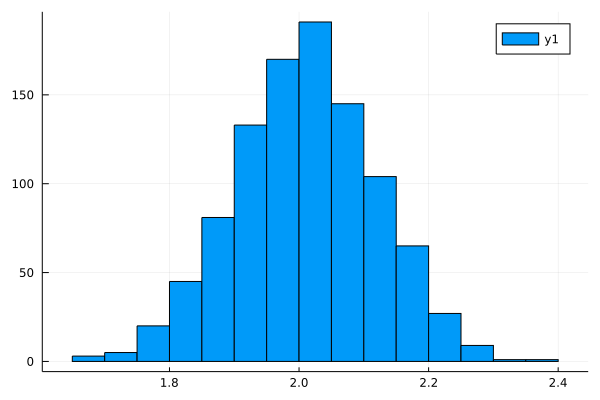

In [9]:
#Media_Binomial
histogram(Media_100_Binomial)

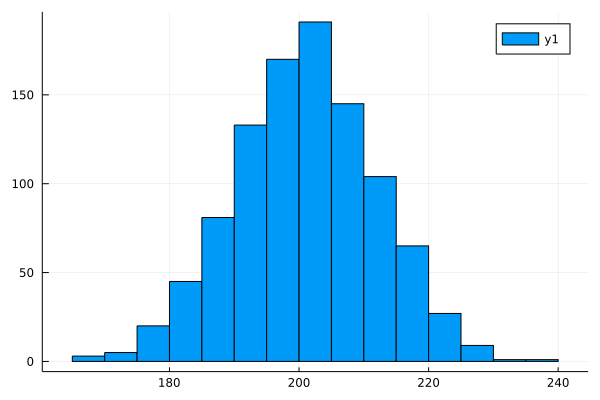

In [10]:
#Total_Binomial
histogram(Total_100_Binomial)

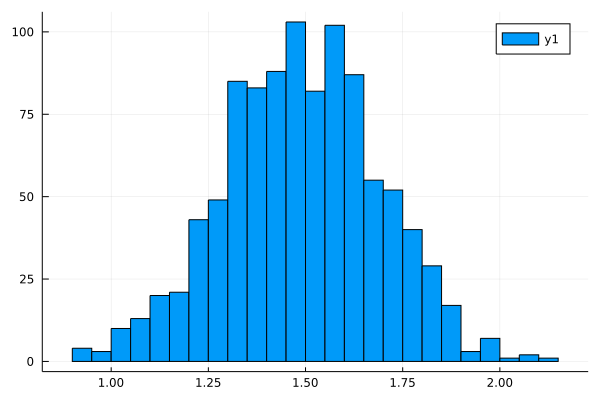

In [11]:
#Media_Normal
histogram(Media_100_Normal)

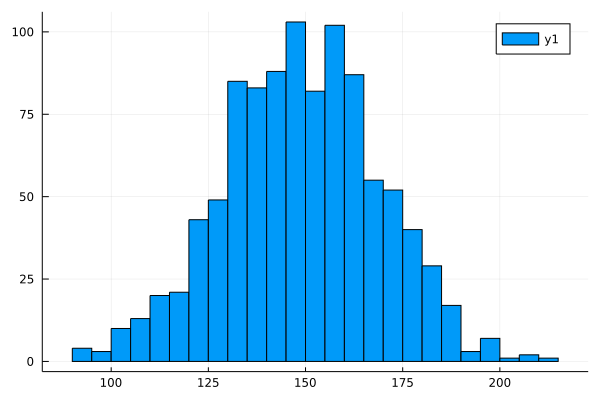

In [12]:
#Total_Normal
histogram(Total_100_Normal)

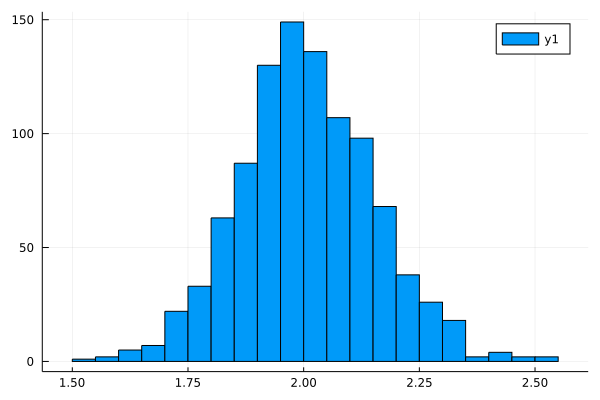

In [13]:
#Media_Poisson
histogram(Media_100_Poisson)

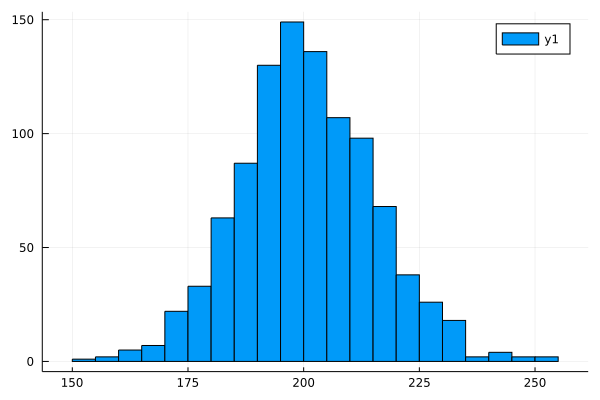

In [14]:
#Total_Poisson
histogram(Total_100_Poisson)

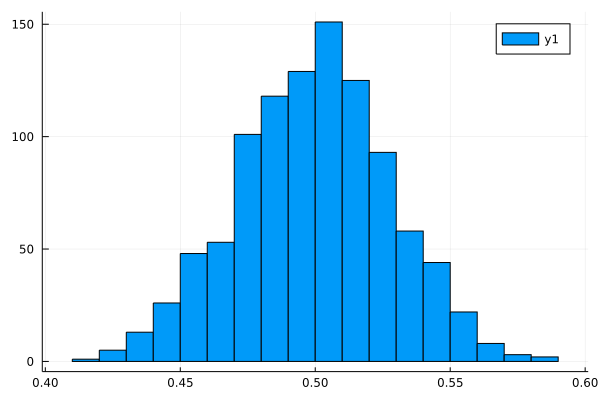

In [15]:
#Media_Uniforme
histogram(Media_100_Uniforme)

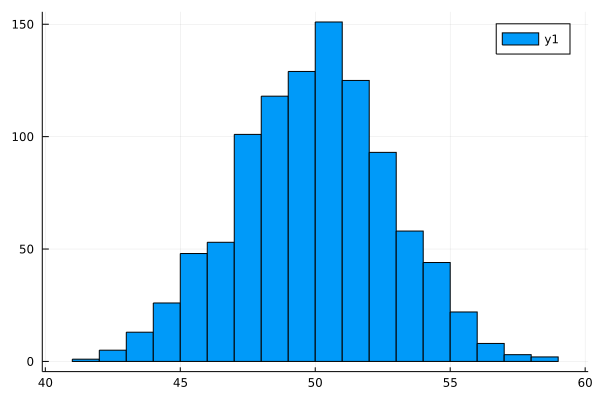

In [16]:
#Total_Uniforme
histogram(Total_100_Uniforme)

#### Amostras de tamanho 20.

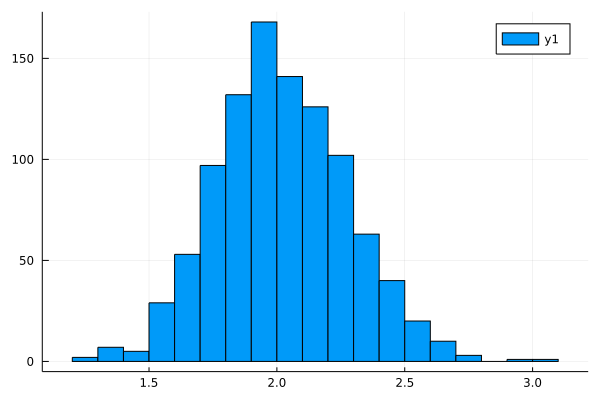

In [17]:
#Media Binomial
histogram(Media_20_Binomial)

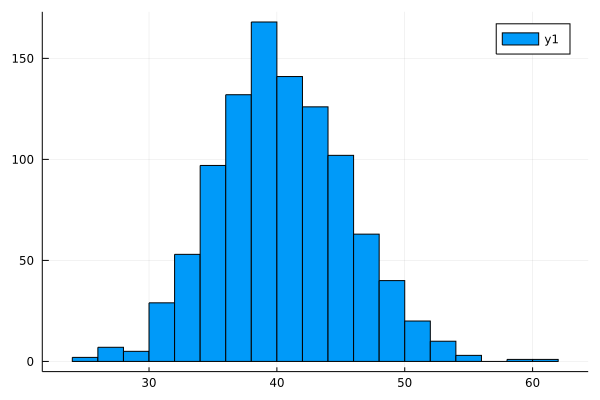

In [18]:
#Total_Binomial
histogram(Total_20_Binomial)

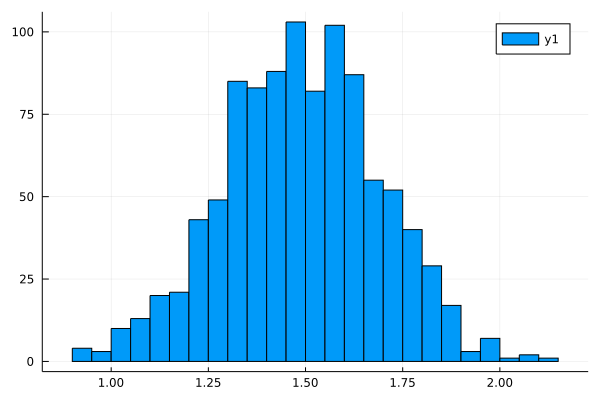

In [19]:
#Média_Normal
histogram(Media_100_Normal)

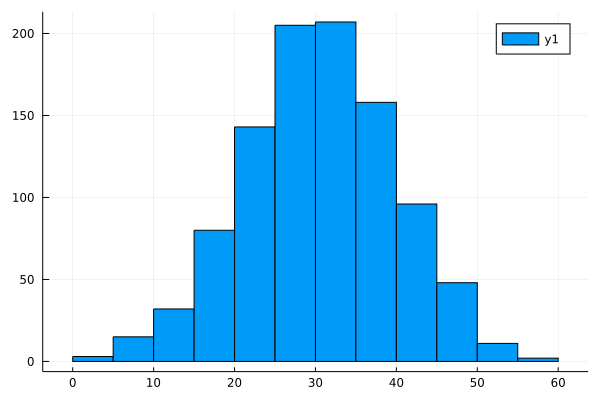

In [20]:
#Total_Normal
histogram(Total_20_Normal)

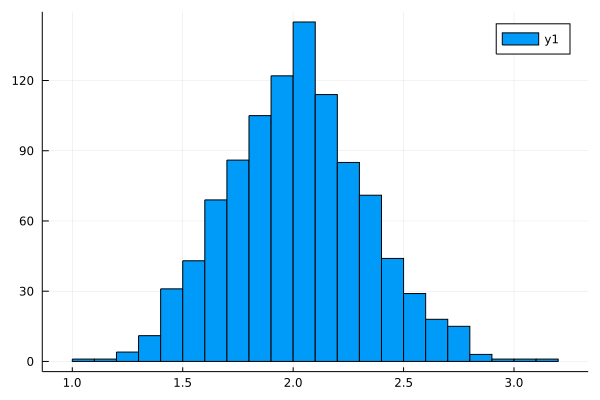

In [21]:
#Media_Poisson
histogram(Media_20_Poisson)

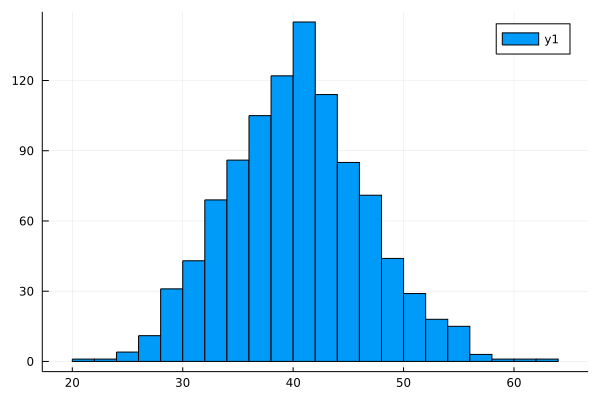

In [22]:
#Total_Poisson
histogram(Total_20_Poisson)

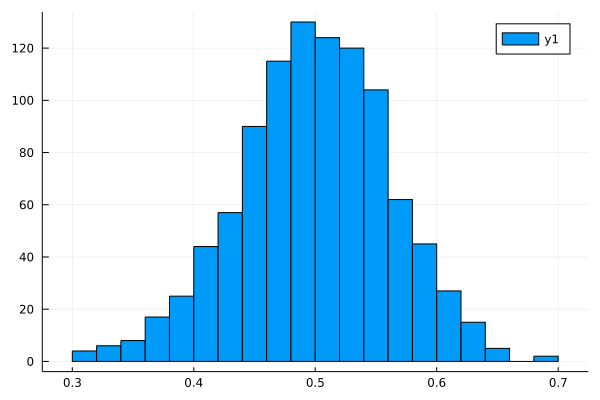

In [23]:
#Media_Uniforme
histogram(Media_20_Uniforme)

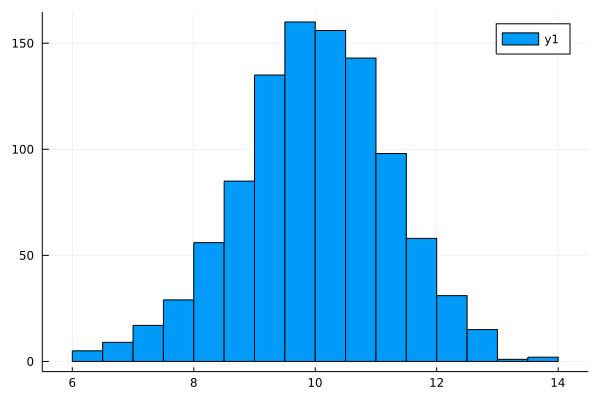

In [24]:
#Total_Uniforme
histogram(Total_20_Uniforme)

### Passo4-Médias e Variâncias das distribuições de Médias e Totais.

#### Amostras de tamanho 100.

In [25]:
#Binomial
println("A média da distribuição de médias para a amostra binomial de tamanho 100 é: ",mean(Media_100_Binomial))
println("A variância da distribuição de médias para a amostra binomial de tamanho 100 é:",var(Media_100_Binomial))
println("A média da distribuição de totais para a amostra binomial de tamanho 100 é: ",mean(Total_100_Binomial))
println("A variância da distribuição de totais para a amostra binomial de tamanho 100 é:",var(Total_100_Binomial))

A média da distribuição de médias para a amostra binomial de tamanho 100 é: 2.00518
A variância da distribuição de médias para a amostra binomial de tamanho 100 é:0.011849016616616618
A média da distribuição de totais para a amostra binomial de tamanho 100 é: 200.518
A variância da distribuição de totais para a amostra binomial de tamanho 100 é:118.49016616616615


In [26]:
#Normal
println("A média da distribuição de médias para a amostra normal de tamanho 100 é: ",mean(Media_100_Normal))
println("A variância da distribuição de médias para a amostra normal de tamanho 100 é:",var(Media_100_Normal))
println("A média da distribuição de totais para a amostra normal de tamanho 100 é: ",mean(Total_100_Normal))
println("A variância da distribuição de totais para a amostra normal de tamanho 100 é:",var(Total_100_Normal))

A média da distribuição de médias para a amostra normal de tamanho 100 é: 1.4897525418206823
A variância da distribuição de médias para a amostra normal de tamanho 100 é:0.04012536672310408
A média da distribuição de totais para a amostra normal de tamanho 100 é: 148.97525418206823
A variância da distribuição de totais para a amostra normal de tamanho 100 é:401.2536672310409


In [27]:
#Poisson
println("A média da distribuição de médias para a amostra poisson de tamanho 100 é: ",mean(Media_100_Poisson))
println("A variância da distribuição de médias para a amostra poisson de tamanho 100 é:",var(Media_100_Poisson))
println("A média da distribuição de totais para a amostra poisson de tamanho 100 é: ",mean(Total_100_Poisson))
println("A variância da distribuição de totais para a amostra poisson de tamanho 100 é:",var(Total_100_Poisson))

A média da distribuição de médias para a amostra poisson de tamanho 100 é: 2.00278
A variância da distribuição de médias para a amostra poisson de tamanho 100 é:0.021300572172172166
A média da distribuição de totais para a amostra poisson de tamanho 100 é: 200.278
A variância da distribuição de totais para a amostra poisson de tamanho 100 é:213.0057217217217


In [28]:
#Uniforme
println("A média da distribuição de médias para a amostra uniforme de tamanho 100 é: ",mean(Media_100_Uniforme))
println("A variância da distribuição de médias para a amostra uniforme de tamanho 100 é:",var(Media_100_Uniforme))
println("A média da distribuição de totais para a amostra uniforme de tamanho 100 é: ",mean(Total_100_Uniforme))
println("A variância da distribuição de totais para a amostra uniforme de tamanho 100 é:",var(Total_100_Uniforme))

A média da distribuição de médias para a amostra uniforme de tamanho 100 é: 0.4994750597377749
A variância da distribuição de médias para a amostra uniforme de tamanho 100 é:0.0007929109189263038
A média da distribuição de totais para a amostra uniforme de tamanho 100 é: 49.94750597377749
A variância da distribuição de totais para a amostra uniforme de tamanho 100 é:7.92910918926304


#### Amostras de tamanho 20

In [29]:
#Binomial
println("A média da distribuição de médias para a amostra binomial de tamanho 20 é: ",mean(Media_20_Binomial))
println("A variância da distribuição de médias para a amostra binomial de tamanho 20 é:",var(Media_20_Binomial))
println("A média da distribuição de totais para a amostra binomial de tamanho 20 é: ",mean(Total_20_Binomial))
println("A variância da distribuição de totais para a amostra binomial de tamanho 20 é:",var(Total_20_Binomial))

A média da distribuição de médias para a amostra binomial de tamanho 20 é: 1.9965500000000003
A variância da distribuição de médias para a amostra binomial de tamanho 20 é:0.0654009984984985
A média da distribuição de totais para a amostra binomial de tamanho 20 é: 39.931
A variância da distribuição de totais para a amostra binomial de tamanho 20 é:26.16039939939939


In [30]:
#Normal
println("A média da distribuição de médias para a amostra normal de tamanho 20 é: ",mean(Media_20_Normal))
println("A variância da distribuição de médias para a amostra normal de tamanho 20 é:",var(Media_20_Normal))
println("A média da distribuição de totais para a amostra normal de tamanho 20 é: ",mean(Total_20_Normal))
println("A variância da distribuição de totais para a amostra normal de tamanho 20 é:",var(Total_20_Normal))

A média da distribuição de médias para a amostra normal de tamanho 20 é: 1.5199610055640735
A variância da distribuição de médias para a amostra normal de tamanho 20 é:0.21307168135216056
A média da distribuição de totais para a amostra normal de tamanho 20 é: 30.399220111281473
A variância da distribuição de totais para a amostra normal de tamanho 20 é:85.22867254086422


In [31]:
#Poisson
println("A média da distribuição de médias para a amostra poisson de tamanho 20 é: ",mean(Media_20_Poisson))
println("A variância da distribuição de médias para a amostra poisson de tamanho 20 é:",var(Media_20_Poisson))
println("A média da distribuição de totais para a amostra poisson de tamanho 20 é: ",mean(Total_20_Poisson))
println("A variância da distribuição de totais para a amostra poisson de tamanho 20 é:",var(Total_20_Poisson))

A média da distribuição de médias para a amostra poisson de tamanho 20 é: 1.9929499999999998
A variância da distribuição de médias para a amostra poisson de tamanho 20 é:0.0983461436436436
A média da distribuição de totais para a amostra poisson de tamanho 20 é: 39.859
A variância da distribuição de totais para a amostra poisson de tamanho 20 é:39.338457457457466


In [32]:
#Uniforme
println("A média da distribuição de médias para a amostra uniforme de tamanho 20 é: ",mean(Media_20_Uniforme))
println("A variância da distribuição de médias para a amostra uniforme de tamanho 20 é:",var(Media_20_Uniforme))
println("A média da distribuição de totais para a amostra uniforme de tamanho 20 é: ",mean(Total_20_Uniforme))
println("A variância da distribuição de totais para a amostra uniforme de tamanho 20 é:",var(Total_20_Uniforme))

A média da distribuição de médias para a amostra uniforme de tamanho 20 é: 0.4993820147276217
A variância da distribuição de médias para a amostra uniforme de tamanho 20 é:0.0038693079927076966
A média da distribuição de totais para a amostra uniforme de tamanho 20 é: 9.987640294552433
A variância da distribuição de totais para a amostra uniforme de tamanho 20 é:1.5477231970830785


### Passo5-Aplicando testes de Normalidade as distribuições de médias e totais.

Usaremos a função "ExactOneSampleKSTest".Tal função é da forma:
ExactOneSampleKSTest(x,d),onde x é uma amostra e d é uma distribuição.A função testa através do método de Kolmogorov-Smirnov se x vem da distribuição d.O nível de significância é de 5%.





In [33]:
#Testes de hipótese referentes as médias e totais das amostras de tamanho 100.
#Observe que em nenhum dos testes abaixo a hipótese nula foi rejeitada.
#Observamos que há um erro pois a rigor,o teste KS não usa parâmetros dos próprios dados,mas isso não afeta o resultado do teste.Portanto a mensagem de erro pode ser ignorada.

print(ExactOneSampleKSTest(Media_100_Binomial,Normal(mean(Media_100_Binomial),sqrt(var(Media_100_Binomial)))))
print(ExactOneSampleKSTest(Total_100_Binomial,Normal(mean(Total_100_Binomial),sqrt(var(Total_100_Binomial)))))
print(ExactOneSampleKSTest(Media_100_Poisson,Normal(mean(Media_100_Poisson),sqrt(var(Media_100_Poisson)))))
print(ExactOneSampleKSTest(Total_100_Poisson,Normal(mean(Total_100_Poisson),sqrt(var(Total_100_Poisson)))))
print(ExactOneSampleKSTest(Media_100_Normal,Normal(mean(Media_100_Normal),sqrt(var(Media_100_Normal)))))
print(ExactOneSampleKSTest(Total_100_Normal,Normal(mean(Total_100_Normal),sqrt(var(Total_100_Normal)))))
print(ExactOneSampleKSTest(Media_100_Uniforme,Normal(mean(Media_100_Uniforme),sqrt(var(Media_100_Uniforme)))))
print(ExactOneSampleKSTest(Total_100_Uniforme,Normal(mean(Total_100_Uniforme),sqrt(var(Total_100_Uniforme)))))

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68


Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0275328

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4269

Details:
    number of observations:   1000
Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0275328

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4269

Details:
    number of observations:   1000
Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0452724

Te

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68


In [34]:
#Teste de hipóteses referentes as médias e totais das amostras de tamanho 20
#A mesma observação sobre a mensagem de erro se aplica aqui.
#Observe que houveram 3 teste que rejeitaram a hipótese nula.Os testes da Média e Total da Binomial e teste do Total da amostra que veio de uma distribuição uniforme.
print(ExactOneSampleKSTest(Media_20_Binomial,Normal(mean(Media_20_Binomial),sqrt(var(Media_20_Binomial)))))
print(ExactOneSampleKSTest(Total_20_Binomial,Normal(mean(Total_20_Binomial),sqrt(var(Total_20_Binomial)))))
print(ExactOneSampleKSTest(Media_20_Poisson,Normal(mean(Media_20_Poisson),sqrt(var(Media_20_Poisson)))))
print(ExactOneSampleKSTest(Total_20_Poisson,Normal(mean(Total_20_Poisson),sqrt(var(Total_20_Poisson)))))
print(ExactOneSampleKSTest(Media_20_Normal,Normal(mean(Media_20_Normal),sqrt(var(Media_20_Normal)))))
print(ExactOneSampleKSTest(Total_20_Normal,Normal(mean(Total_20_Normal),sqrt(var(Total_20_Normal)))))
print(ExactOneSampleKSTest(Media_20_Uniforme,Normal(mean(Media_20_Uniforme),sqrt(var(Media_20_Uniforme)))))
print(ExactOneSampleKSTest(Total_20_Uniforme,Normal(mean(Total_100_Uniforme),sqrt(var(Total_100_Uniforme)))))


Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0652179

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0004

Details:
    number of observations:   1000
Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0652179

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0004

Details:
    number of observations:   1000
Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0458233

Test summary:
    

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68
┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/anselmo/.julia/packages/HypothesisTests/ED0fC/src/kolmogorov_smirnov.jl:68




Details:
    number of observations:   1000


# Conclusão

Os resultados dos testes são esperados,visto que o teorema central dos limites nos garante que a média amostral de uma amostra independente e identicamente distribuida converge para uma distribuição normal com os parâmetros corretos.O que pudemos observar em nossos experimentos é que todos os teste com as amostras de tamanho 100 a hipótese nula foi mantida.No caso do tamanho de amostra 20,houveram 3 testes que rejeitaram a hipótese nula,em geral para as distribuições contínuas o teste de Kolmogorov-Smirnov com ambos tamanhos de amostra aceitou a hipótese nula.
